Curves can be expressed parametrically by representing each coordinate with an explicit equation in terms of a 'time' parameter. The following code defines a parametric expression for a 3D curve, based on a parameter $t$ and three extra $\alpha$, $\beta$ and $\gamma$ symbolic values. This notebook introduces the finite difference method for a partial derivative vector to approximate a solution once an objective function is defined.

In [ ]:
from sympy import *    

In [4]:
# symbol definition

t = symbols('t')

a = symbols('alpha')
b = symbols('beta')
c = symbols('gamma')

fx = cos(t*a) + 1/3
fy = sin(t+b)
fz = sin(t+c) * 1/4 + pow(c, 0.5)

display(fx)
display(fy)
display(fz)

cos(alpha*t) + 0.333333333333333

sin(beta + t)

gamma**0.5 + sin(gamma + t)/4

In [5]:
import numpy as np

In [6]:
# evaluation:

In [7]:
def f0_parametric(t1, alpha1, beta1, gamma1):

    return np.array( [fx.subs({t:t1, a:alpha1}).evalf(), 
                      fy.subs({t:t1, b:beta1} ).evalf(),
                      fz.subs({t:t1, c:gamma1}).evalf() ],  
                      
                      dtype=np.float64 )

In [8]:
def f1_parametric(t1, alpha1, beta1, gamma1):

    return np.array( [fx.diff(t, 1).subs({t:t1, a:alpha1}).evalf() , 
                      fy.diff(t, 1).subs({t:t1, b:beta1} ).evalf(),
                      fz.diff(t, 1).subs({t:t1, c:gamma1}).evalf() ] , 

                      dtype=np.float64)

In [9]:
def f2_parametric(t1, alpha1, beta1, gamma1):

    return np.array( [fx.diff(t, 2).subs({t:t1, a:alpha1}).evalf() , 
                      fy.diff(t, 2).subs({t:t1, b:beta1} ).evalf() ,
                      fz.diff(t, 2).subs({t:t1, c:gamma1}).evalf() ],

                      dtype=np.float64)

In [10]:
# printing demo:

In [11]:
import numpy as np

In [12]:
np.random.rand(3)

array([0.17484987, 0.81442921, 0.85197995])

In [13]:
coeffs_samples = [ np.random.rand(3) for _ in range(3) ]

print(coeffs_samples[0])

beziers = f0_parametric(0.1, *coeffs_samples[0])

print(beziers)

[0.74315087 0.7631424  0.34427758]
[1.33057324 0.75988904 0.69420314]


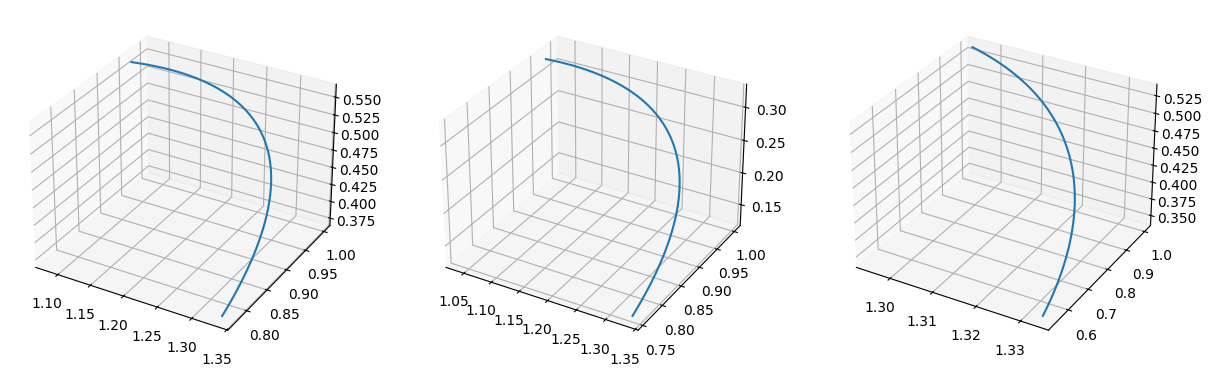

In [14]:

import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(15, 5), subplot_kw=dict(projection='3d'))

coeffs_samples = [ np.random.rand(3) for _ in range(3) ]

beziers = [ [ f0_parametric(t, *coeffs_samples[i]) for t in np.linspace(0.0, 1.0, num=100) ] for i in range(3) ]

for idx, bezier in enumerate(beziers):

    xs, ys, zs = list(zip(*bezier))

    axs[idx].plot(xs, ys, zs)

plt.show()

# ok, almost done; 

In [15]:
# objective function:

In [16]:
import math

def curvature(t, a1, b1, c1):
      
        v = f1_parametric(t, a1, b1, c1)

        a = f2_parametric(t, a1, b1, c1)

        w = np.cross(v,a)

        magnitude = np.linalg.norm(w)

        speed = np.linalg.norm(v)

        return magnitude / math.pow(speed,3)

Partial derivative vector:

$$
\nabla f(x) = \begin{bmatrix} \frac{\partial f}{\partial x_1} \\ \frac{\partial f}{\partial x_2} \\ \vdots \\ \frac{\partial f}{\partial x_d} \end{bmatrix}
$$

where we can approximate each partial derivative as:

$$\frac{\partial f(x)}{\partial x_1} \approx \frac{f(x+h e_1)-f(x)}{h} \quad \text{where} \quad e_1 = \begin{bmatrix}1 \\ 0 \\ \vdots \\ 0 \end{bmatrix}$$

in general:

$$

\frac{\partial f(x)}{\partial x_j} \approx \frac{f(x+h e_j)-f(x)}{h}

$$

where $e_j$ is at position $j$ and zero elsewhere.

In [18]:
import numpy as np

In [19]:
def parametric_coeffs_objective(inputX, coeffs):

    curvt = np.array([curvature(t2, coeffs[0], coeffs[1]) for t2 in inputX])

    return curvt

In [20]:
# calculates the mean squared error (MSE)

def cost_MSE(input_value, coeffs, target_value):

    predicted_value = parametric_coeffs_objective(input_value, coeffs)

    difference = (target_value - predicted_value)**2

    return sum(difference) / len(difference)

In [21]:
def gradient_value_using_approx(inputX, outputY, coeffs):

    f = cost_MSE

    h = 0.001

    r_grad = []

    for i in range(len(coeffs)):
                   
        # update current value: (into a copy array;)

        cof_cp = np.copy(coeffs)

        cof_cp[i] = coeffs[i] + h 
    
        i_grad_val = (f(inputX, cof_cp, outputY) -f(inputX, coeffs, outputY)) / h

        r_grad.append(i_grad_val)

    print(r_grad)

    return r_grad

In [22]:
# gradient descent with callback function for printing and storing values (for example)

def gradient_descent(

    gradient, x, y,
    start,learn_rate=0.1, 
    n_iter=50, tolerance=1e-06,

    callback = lambda x : print(x)
):

    vector = start

    for _ in range(n_iter):

        diff = -learn_rate * np.array(gradient(x, y, vector))

        if np.all(np.abs(diff) <= tolerance):

            break

        vector += diff

        callback(np.copy(vector))

    return vector

In [23]:
# test the algorithm:

In [24]:
def parametric_coeffs_objective(inputX, coeffs):

    curvt = np.array([curvature(t2, 
                                coeffs[0], 
                                coeffs[1], 
                                coeffs[2]) for t2 in inputX])

    return curvt

In [25]:
# define the objective function: 
x = np.linspace(0, 2 * np.pi, 100)
y = parametric_coeffs_objective(x, [0.5, 0.5, 0.5])

values = [] 

# execute gradient descent
gradient_descent(
    gradient_value_using_approx, x, y, 
    start=[1.2, 1.0, 1.0], learn_rate=0.001, n_iter=10,
    callback = lambda x : values.append(x)
)

# print iteration values;
print(values)

[-5.1878157748550535, 17.56954910502806, 1.0944181279928245]
[-4.681979614659326, 15.810090941945631, 0.9611841803316423]
[-4.305601602082376, 14.411623052964728, 0.8598455911048575]
[-4.020547663069252, 13.267061028049199, 0.780157737048981]
[-3.8029443520315453, 12.308529050899963, 0.715838524765644]
[-3.637083973321964, 11.490723650334544, 0.6628172709781666]
[-3.512230638646585, 10.782142967043384, 0.6183383596756187]
[-3.420827976055918, 10.16013775333846, 0.5804687324779678]
[-3.3574367018065487, 9.60796265559516, 0.5478114591319638]
[-3.3180756763542263, 9.11293892219156, 0.519331198947981]
[array([1.20518782, 0.98243045, 0.99890558]), array([1.2098698 , 0.96662036, 0.9979444 ]), array([1.2141754 , 0.95220874, 0.99708455]), array([1.21819594, 0.93894168, 0.99630439]), array([1.22199889, 0.92663315, 0.99558856]), array([1.22563597, 0.91514242, 0.99492574]), array([1.2291482 , 0.90436028, 0.9943074 ]), array([1.23256903, 0.89420014, 0.99372693]), array([1.23592647, 0.88459218, 0.9